In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-05-27 07:54:24.764254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 07:54:26.116823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Data Sherlock Holmes
path = "Sherlock Holmes.txt"

with open(path, 'r') as file:
  content = file.read()

corpus = content.lower().split("\n")

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'of': 5, 'a': 6, 'in': 7, 'that': 8, 'it': 9, 'he': 10, 'you': 11, 'was': 12, 'his': 13, 'is': 14, 'my': 15, 'have': 16, 'as': 17, 'with': 18, 'had': 19, 'which': 20, 'at': 21, 'for': 22, 'but': 23, 'me': 24, 'not': 25, 'be': 26, 'we': 27, 'from': 28, 'there': 29, 'this': 30, 'said': 31, 'upon': 32, 'so': 33, 'holmes': 34, 'him': 35, 'her': 36, 'she': 37, "'": 38, 'very': 39, 'your': 40, 'been': 41, 'all': 42, 'on': 43, 'no': 44, 'what': 45, 'one': 46, 'then': 47, 'were': 48, 'by': 49, 'are': 50, 'an': 51, 'would': 52, 'out': 53, 'when': 54, 'up': 55, 'man': 56, 'could': 57, 'has': 58, 'do': 59, 'into': 60, 'mr': 61, 'who': 62, 'little': 63, 'will': 64, 'if': 65, 'some': 66, 'now': 67, 'see': 68, 'down': 69, 'should': 70, 'our': 71, 'or': 72, 'they': 73, 'may': 74, 'well': 75, 'am': 76, 'us': 77, 'over': 78, 'more': 79, 'think': 80, 'room': 81, 'know': 82, 'shall': 83, 'about': 84, 'can': 85, 'before': 86, 'must': 87, 'only':

In [5]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]

    input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
sentence = corpus[10].split()
print(f'sample sentence: {sentence}')

token_list = []

for word in sentence:
  token_list.append(tokenizer.word_index[word])

print(token_list)

sample sentence: ['table', 'of', 'contents']
[226, 5, 1562]


In [7]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 226]
decoded to text: ['table']


In [8]:
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 5


In [10]:
# Build Model

model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len-1),
    Bidirectional(LSTM(20)),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(xs, ys, epochs=100)
# as the data is big training will take more time so i decided to make less epochs if you want great results just upgared the epochs to 500 or 1000

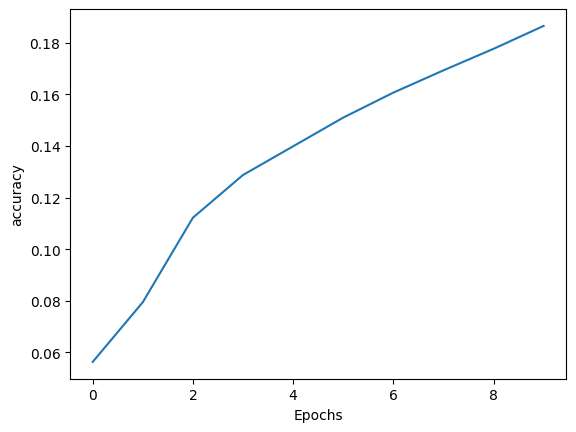

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [ ]:
# Define seed text
text = "Sherlock, you need to "

# Define total words to predict
next_words = 50

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  probabilities = model.predict(token_list)
  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities)[0][-choice]
  if predicted != 0:
	  output_word = tokenizer.index_word[predicted]
	  text += " " + output_word

# Print the result
print(text)

1/1 [==============================] - 0s 22ms/step
Sherlock, you need to  the her his the his her his his her his his his his his the his her his her the his his his her the her her her the his the her the his her the her his the her the the her the her the the her his her
